In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
plt.rc('font',family='Times New Roman') 
plt.style.use("ggplot")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

font_T = fm.FontProperties(family='Times New Roman', size=24, stretch=0, weight='bold')

e:\anaconda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
e:\anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
df_heatmap = pd.read_csv('df_heatmap.csv')
df_heatmap

,hard,repetition,fre_total_1,fre_total_2,fre_total_3,fre_total_4,fre_total_5,fre_position_1,fre_position_2,fre_position_3,fre_position_4,fre_position_5
0,1362,0,4.802260,6.271186,3.559322,3.107345,3.615819,14.124294,11.581921,7.627119,4.237288,2.259887
1,1763,0,3.954802,7.457627,8.813559,4.802260,1.977401,9.039548,10.169492,11.864407,7.344633,4.519774
2,1913,2,2.881356,7.457627,7.457627,2.881356,10.282486,4.802260,14.124294,5.649718,4.519774,20.338983
3,2242,0,0.282486,3.559322,10.282486,7.457627,3.389831,0.847458,4.802260,8.192090,8.192090,13.559322
4,3017,0,2.994350,7.457627,5.649718,4.802260,1.977401,3.389831,10.169492,12.146893,7.344633,4.519774
...,...,...,...,...,...,...,...,...,...,...,...,...
349,2012,2,3.954802,7.457627,4.802260,2.994350,7.457627,9.039548,14.124294,6.497175,1.977401,3.107345
350,1937,0,5.649718,3.107345,3.615819,10.282486,6.271186,2.824859,1.694915,3.954802,12.146893,6.779661
351,1919,0,3.898305,8.813559,1.355932,7.457627,3.954802,3.107345,13.276836,2.259887,4.802260,1.412429
352,1973,0,3.107345,7.457627,6.271186,8.813559,7.457627,5.649718,14.124294,2.542373,8.474576,9.887006


In [6]:
df_corr = df_heatmap.corr()
df_corr.loc[['hard'],:]

,hard,repetition,fre_total_1,fre_total_2,fre_total_3,fre_total_4,fre_total_5,fre_position_1,fre_position_2,fre_position_3,fre_position_4,fre_position_5
hard,1.0,-0.057477,0.000147,0.002689,0.050894,-0.037578,0.085746,0.12355,0.087701,0.078768,-0.01561,0.061005


# 热力图

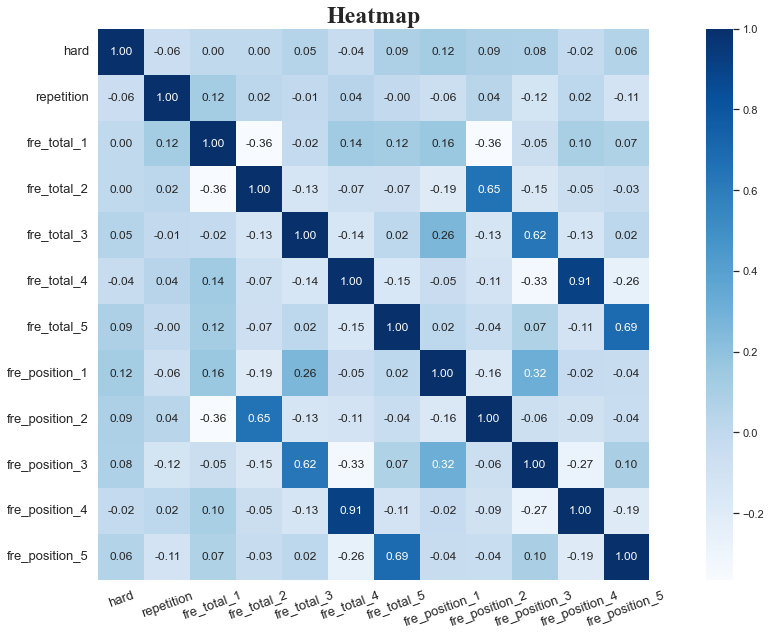

In [12]:
sns.set_theme(style="white")  
# 画图
fig, ax = plt.subplots(figsize=(16, 9))
# 输入数据仅一行相关系数
sns.heatmap(df_corr,
            cmap="Blues", fmt=".2f",
            annot_kws={"size": 12},
            annot=True, square=True
            )

# 添加标题
plt.title('Heatmap', fontproperties = font_T)

# 坐标轴刻度字体
ax.tick_params(labelsize=13)
# 横纵坐标轴刻度值旋转
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# 单行热力图

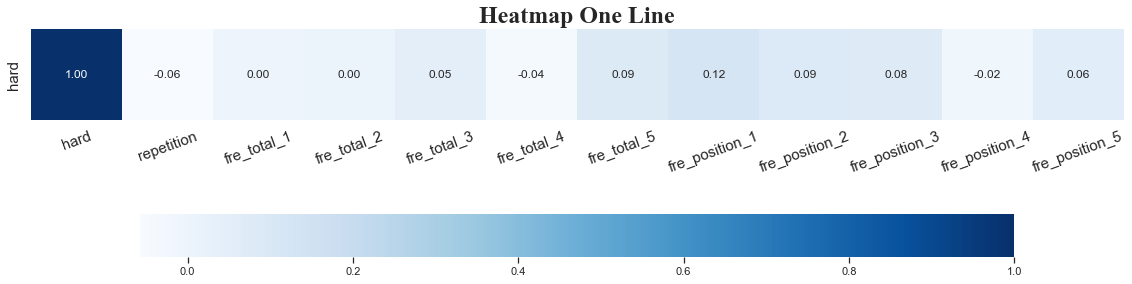

In [8]:
sns.set_theme(style="white")  
# 画图
fig, ax = plt.subplots(figsize=(16, 9))
# 输入数据仅一行相关系数
sns.heatmap(df_corr.loc[['hard'],:],
            cmap="Blues", fmt=".2f", annot_kws={"size": 12},
            annot=True, square=True,
            # 设置水平尺度条
            cbar_kws={'orientation': 'horizontal',"shrink": 0.8})

# 添加标题
plt.title('Heatmap One Line', fontproperties = font_T)

# 坐标轴刻度字体
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.savefig('heatmap_one.png', dpi=300, bbox_inches='tight')